<a href="https://colab.research.google.com/github/hawkilol/Buscas/blob/main/buscas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho Buscas 

Q2 - Buscas estados quadrado magico

In [ ]:
mq = [[6, 9, 8],
      [7, 1, 3],
      [2, 5, 4]]

m = [[1, 2, 3]]

# quatro direções (cima, esquerda, baixo e direita)
# A ordem de consulta dos estados adjacentes deve ser: cima, baixo, esquerda e direita.
# moves = [[-1, 0], [+1, 0], [0,-1], [0, +1]] moves no neighbor
moves1 = [[-1, 0], [+1, 0], [0, -1], [0, +1]]


# ordem cima, esquerda, baixo direita
# moves1 = [[-1, 0], [0, -1], [+1, 0], [0, +1]]

# Verifica se a matriz é um quadrado magico
# Verifica se a soma de todas as linhas, colunas e diagonais é a mesma
def isMagicSquare(mat):
    ln = len(mat)
    # Soma das diagonais 1 e 2
    sumd1 = 0
    sumd2 = 0
    for i in range(ln):
        sumd1 += mat[i][i]
        sumd2 += mat[i][ln - i - 1]
        # Verifica a igualdade da soma das diagonais
    if not (sumd1 == sumd2):
        return False
    for i in range(ln):
        # sumr is rowsum and sumc is colsum
        sumr = 0
        sumc = 0
        for j in range(ln):
            sumr += mat[i][j]
            sumc += mat[j][i]
        if not (sumr == sumc == sumd1):
            return False
        #se a soma de todas as linhas, colunas e diagonais é a mesma então a matriz é um quadrado magico
    return True


#Troca a posição do 9 de acordo com o movimento
def move(matrix, move):
    j = -1

    for i in matrix:
        j += 1
        if 9 in i:
            swapY = i.index(9)

            swapX = j
    swapToX = move[0] + swapX
    swapToY = move[1] + swapY

    #Verifica se o movimento é valido
    if 0 <= swapToX < 3 and 0 <= swapToY < 3:
        matrix[swapX][swapY], matrix[swapToX][swapToY] = matrix[swapToX][swapToY], matrix[swapX][swapY]

    return matrix

#Retorna os quadrados magicos vizinhos a partir dos movimentos
def neighborsSquare(matrix, moves):
    result = []
    for i in moves:
        matrixAux = [row[:] for row in matrix]
        matrixAux = move(matrixAux, i)
        result.append(matrixAux)
    return result


def bfsMagicSquare(start, moves):
    """Busca em largura dos estados a partir do estado inicial de acordo com os movimentos permitidos"""
    #estados explorados
    explored = []
    #estados na fronteira que podem ser explorados
    frontier = [[start]]

    #se o estado inicial é um quadrado magico
    if isMagicSquare(start):
        explored.append(start)

        return explored


    while frontier:
        # first in
        path = frontier.pop(0)

        #ultimo node do caminho
        node = path[-1]
        if node not in explored:
            neighbors = neighborsSquare(node, moves)
            #constroi um camiho de nodes vizinhos para montar um caminho
            for neighbor in neighbors:
                nPath = list(path)
                nPath.append(neighbor)
                frontier.append(nPath)
                #se o estado vizinho é um quadrado magico
                if isMagicSquare(neighbor):
                    return nPath


            explored.append(node)
    return "Nenhum caminho encontrado"


def dfsMagicSquare(start, moves):
    """Busca em profundidade dos estados a partir do estado inicial de acordo com os movimentos permitidos"""
    # estados explorados
    explored = []
    # estados na fronteira que podem ser explorados
    frontier = [[start]]

    # se o estado inicial é um quadrado magico
    if isMagicSquare(start):
        explored.append(start)

        return explored

    while frontier:
        # last in
        path = frontier.pop(-1)

        # ultimo node do caminho
        node = path[-1]
        if node not in explored:
            neighbors = neighborsSquare(node, moves)
            # constroi um camiho de nodes vizinhos para montar um caminho
            for neighbor in neighbors:
                nPath = list(path)
                nPath.append(neighbor)
                frontier.append(nPath)
                # se o estado vizinho é um quadrado magico
                if isMagicSquare(neighbor):
                    return nPath

            explored.append(node)
    return "Nenhum caminho encontrado"










[0.06472563743591309, 0.14670634269714355, 0.061177968978881836, 0.065887451171875, 0.0647423267364502, 0.06699538230895996, 0.06331825256347656, 0.06549263000488281, 0.07733750343322754]


a) Sequência de estados visitados busca em largura:

In [ ]:
import time
start_time = time.time()


moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
print("\n BFS: ")
path = bfsMagicSquare(mq, moveS)
timeBFS = (time.time() - start_time)


for i in path:
    print("\n")
    bfsMagicSquare = '\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in i])
    print(bfsMagicSquare)


 BFS: 
--- 0.0006840229034423828 seconds ---


   6   9   8
   7   1   3
   2   5   4


   6   1   8
   7   9   3
   2   5   4


   6   1   8
   7   5   3
   2   9   4


b) Sequência de estados visitados busca em profundidade:

In [ ]:
import time
start_time = time.time()
moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
print("\n DFS: ")
path = dfsMagicSquare(mq, moveS)
timeDFS = (time.time() - start_time)
print("--- %s seconds ---" % timeDFS)
for i in path:
    print("\n")
    bfsMagicSquare = '\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in i])
    print(bfsMagicSquare)


 DFS: 
--- 0.06687808036804199 seconds ---


   6   9   8
   7   1   3
   2   5   4


   6   8   9
   7   1   3
   2   5   4


   6   8   3
   7   1   9
   2   5   4


   6   8   3
   7   9   1
   2   5   4


   6   8   3
   9   7   1
   2   5   4


   6   8   3
   2   7   1
   9   5   4


   6   8   3
   2   7   1
   5   9   4


   6   8   3
   2   7   1
   5   4   9


   6   8   3
   2   7   9
   5   4   1


   6   8   3
   2   9   7
   5   4   1


   6   8   3
   9   2   7
   5   4   1


   6   8   3
   5   2   7
   9   4   1


   6   8   3
   5   2   7
   4   9   1


   6   8   3
   5   2   7
   4   1   9


   6   8   3
   5   2   9
   4   1   7


   6   8   3
   5   9   2
   4   1   7


   6   8   3
   9   5   2
   4   1   7


   6   8   3
   4   5   2
   9   1   7


   6   8   3
   4   5   2
   1   9   7


   6   8   3
   4   5   2
   1   7   9


   6   8   3
   4   5   9
   1   7   2


   6   8   3
   4   9   5
   1   7   2


   6   8   3
   9   4   5
   1   7   2


   6   8   

c) O algoritmo de busca em largura acha o estado final mais rapido que o algoritmo de busca em profundidade, uma vez que a lista FIFO da busca em largura armazena os estados de acordo com a ordem dos movimentos em uma ordem mais favorável

d) Tempo Computacional BFS:

Tempos BFS:  [5.650520324707031e-05, 3.314018249511719e-05, 3.1948089599609375e-05, 3.1948089599609375e-05, 3.147125244140625e-05, 3.933906555175781e-05, 3.123283386230469e-05, 3.170967102050781e-05, 3.170967102050781e-05, 3.147125244140625e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.123283386230469e-05, 3.0994415283203125e-05, 6.175041198730469e-05, 3.814697265625e-05, 3.075599670410156e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.075599670410156e-05, 3.075599670410156e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.075599670410156e-05, 3.0517578125e-05, 3.075599670410156e-05, 3.647804260253906e-05]


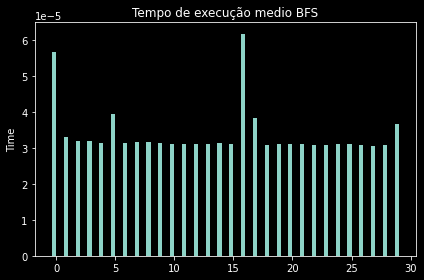

In [ ]:
import matplotlib.pyplot as plt
moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
import time
timesBFS = []


for i in range(30):
  start_time = time.time()
  bfsMagicSquare(mq, moveS)
  tBFS = (time.time() - start_time)
  timesBFS.append(tBFS)


print("Tempos BFS: ", timesBFS)
y1 = timesBFS


import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(y1))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='BFS')

ax.set_ylabel('Time')
ax.set_title('Tempo de execução medio BFS')


fig.tight_layout()

plt.show()

[5.650520324707031e-05, 3.314018249511719e-05, 3.1948089599609375e-05, 3.1948089599609375e-05, 3.147125244140625e-05, 3.933906555175781e-05, 3.123283386230469e-05, 3.170967102050781e-05, 3.170967102050781e-05, 3.147125244140625e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.123283386230469e-05, 3.0994415283203125e-05, 6.175041198730469e-05, 3.814697265625e-05, 3.075599670410156e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.075599670410156e-05, 3.075599670410156e-05, 3.0994415283203125e-05, 3.0994415283203125e-05, 3.075599670410156e-05, 3.0517578125e-05, 3.075599670410156e-05, 3.647804260253906e-05]
[0.06535029411315918, 0.06186342239379883, 0.061161041259765625, 0.0655980110168457, 0.06720614433288574, 0.1416921615600586, 0.0629429817199707, 0.06786489486694336, 0.07417702674865723, 0.06730890274047852, 0.06489348411560059, 0.08008217811584473, 0.06466460227966309, 0.07036375999450684, 0.1339135169

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


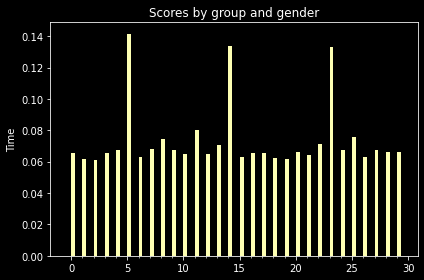

In [ ]:
import matplotlib.pyplot as plt


print(timesBFS)
print(timesDFS)
y1 = timesBFS
y2 = timesDFS



import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']


x = np.arange(len(y1))  # the label locations
y = np.arange(len(y2)) 
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='BFS')
rects2 = ax.bar(y + width/2, y2, width, label='DFS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.set_xticks(y, labels)



#plt.style.use('black')

fig.tight_layout()

plt.show()


d) Tempo Computacional DFS:

[0.06926918029785156, 0.06490182876586914, 0.0634772777557373, 0.06890630722045898, 0.06732726097106934, 0.07064199447631836, 0.19206833839416504, 0.06367325782775879, 0.09199070930480957, 0.07087039947509766, 0.07003998756408691, 0.06565737724304199, 0.07322907447814941, 0.06688451766967773, 0.08883213996887207, 0.16941571235656738, 0.06975483894348145, 0.07861328125, 0.06491708755493164, 0.06550264358520508, 0.08688163757324219, 0.07352662086486816, 0.07047009468078613, 0.06629109382629395, 0.16511774063110352, 0.06953167915344238, 0.06700253486633301, 0.07006144523620605, 0.06487727165222168, 0.087371826171875]
TemposDFS:  [0.06926918029785156, 0.06490182876586914, 0.0634772777557373, 0.06890630722045898, 0.06732726097106934, 0.07064199447631836, 0.19206833839416504, 0.06367325782775879, 0.09199070930480957, 0.07087039947509766, 0.07003998756408691, 0.06565737724304199, 0.07322907447814941, 0.06688451766967773, 0.08883213996887207, 0.16941571235656738, 0.06975483894348145, 0.0786132

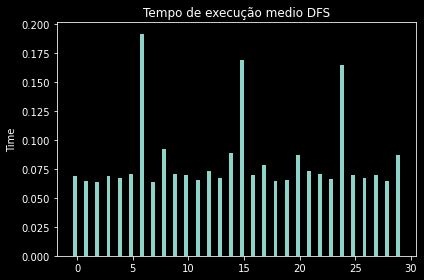

In [ ]:
import matplotlib.pyplot as plt
moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
import time

timesDFS = []



for i in range(30):
  start_time = time.time()
  dfsMagicSquare(mq, moveS)
  tDFS = (time.time() - start_time)
  timesDFS.append(tDFS)

print(timesDFS)


print("TemposDFS: ", timesDFS)
y1 = timesDFS


import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(y1))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='DFS')

ax.set_ylabel('Time')
ax.set_title('Tempo de execução medio DFS')


fig.tight_layout()


d) Em media os tempos computacionais da busca em profundidade são 1x10**3 maiores os tempos computacionais da busca em largura. 

e) Alterando a ordem das consultas para cima, esquerda, baixo e direita:

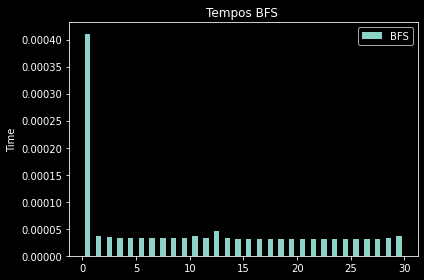

In [ ]:
moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
import time
timesBFS = []
timesDFS = []

for i in range(30):
  start_time = time.time()
  bfsMagicSquare(mq, moveS)
  tBFS = (time.time() - start_time)
  timesBFS.append(tBFS)

for i in range(30):
  start_time = time.time()
  dfsMagicSquare(mq, moveS)
  tDFS = (time.time() - start_time)
  timesDFS.append(tDFS)


y1 = timesBFS
y2 = timesDFS


import matplotlib.pyplot as plt
import numpy as np





x = np.arange(len(y1))  # the label locations
y = np.arange(len(y2)) 

width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width, y1, width, label='BFS')
#rects2 = ax.bar(y + width + 0.25, y2, width, label='DFS')


ax.set_ylabel('Time')
ax.set_title('Tempos BFS ')
ax.legend()



#plt.style.use('black')

fig.tight_layout()

plt.show()

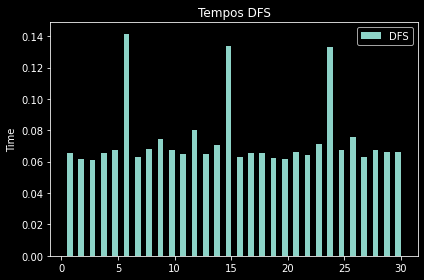

In [ ]:
moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
timesDFS = []
for i in range(30):
  start_time = time.time()
  dfsMagicSquare(mq, moveS)
  tDFS = (time.time() - start_time)
  timesDFS.append(tDFS)


y1 = timesBFS
y2 = timesDFS


import matplotlib.pyplot as plt
import numpy as np





x = np.arange(len(y1))  # the label locations
y = np.arange(len(y2)) 

width = 0.5  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x + width, y1, width, label='BFS')
rects2 = ax.bar(y + width + 0.25, y2, width, label='DFS')


ax.set_ylabel('Time')
ax.set_title('Tempos DFS')
ax.legend()



#plt.style.use('black')

fig.tight_layout()

plt.show()

e)Ao invés de alterar a ordem das consultas para cima, esquerda, baixo e direita como previsto, ao buscar o motivo do atraso do DFS em relação ao BFS, nota-se que o motivo é a lista LIFO, assim o resultado da troca é mais eficiente se a alteração for para direita, baixo, esquerda e cima, a qual é a ordem inversa, assim o fator de ramificação e a profundidade máxima da árvore continuam as mesmas enquanto a profundidade da solução mais rasa pode mudar de acordo com a ordem dos movimentos.

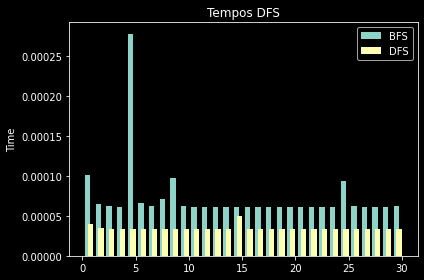

In [ ]:
#moves1 = [[-1, 0], [0, -1], [+1, 0], [0, +1]]
#moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
#ordem direita, baixo, esquerda e cima
moveS = [[0, +1], [0, -1], [+1, 0],[-1, 0]]
timesDFS = []
timesBFS = []
for i in range(30):
  start_time = time.time()
  bfsMagicSquare(mq, moveS)
  tBFS = (time.time() - start_time)
  timesBFS.append(tBFS)
for i in range(30):
  start_time = time.time()
  dfsMagicSquare(mq, moveS)
  tDFS = (time.time() - start_time)
  timesDFS.append(tDFS)


y1 = timesBFS
y2 = timesDFS


import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(y1))  # the label locations
y = np.arange(len(y2)) 

width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width, y1, width, label='BFS')
rects2 = ax.bar(y + width + 0.25, y2, width, label='DFS')


ax.set_ylabel('Time')
ax.set_title('Tempos DFS')
ax.legend()



#plt.style.use('black')

fig.tight_layout()

plt.show()

In [ ]:
#moves1 = [[-1, 0], [0, -1], [+1, 0], [0, +1]]
import time
start_time = time.time()
#moveS = [[-1, 0], [+1, 0], [0, -1], [0, +1]]
#ordem direita, baixo, esquerda e cima
moveS = [[0, +1], [0, -1], [+1, 0],[-1, 0]]
#movesS = [[-1, 0], [0, -1], [+1, 0], [0, +1]]
print("\n DFS: ")
path = dfsMagicSquare(mq, moveS)
timeDFS = (time.time() - start_time)
print("--- %s seconds ---" % timeDFS)
for i in path:
    print("\n")
    bfsMagicSquare = '\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in i])
    print(bfsMagicSquare)


 DFS: 
--- 0.00027632713317871094 seconds ---


   6   9   8
   7   1   3
   2   5   4


   6   1   8
   7   9   3
   2   5   4


   6   1   8
   7   5   3
   2   9   4


Q3 - buscas Astar, uniforme e gulosa 

In [ ]:
#Node que representam cada posição com coordenadas e parentes
class Node():
    def __init__(self, coordinates=None):
        self.parent = None
        self.coordinates = coordinates
        self.x = coordinates[0]
        self.y = coordinates[1]

        self.g = 1
        self.h = 1
        self.f = 1

    def __eq__(self, other):
        return self.coordinates == other.coordinates

class Matrix:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.maze = []


#Retorna uma lista de vizinhos de uma coordenada de acordo com os movimentos possiveis a partir dela
def neighbors(node, nodes):
    moves = [[-1, 0], [0, -1], [+1, 0], [0, +1]]
    result = []
    for move in moves:
        neighbor = [node[0] + move[0], node[1] + move[1]]
        if neighbor in nodes and node in nodes and 0 <= neighbor[0] < matrix.width and 0 <= neighbor[1] < matrix.height:
            result.append(neighbor)
    return result

#Converte coordenadas em string para coordenadas int
#OBS: Isso é usado já que as keys do dict em python não pode ser uma lista, então esse programa guarda uma string das coordenadas
def stringToCord(cords):
    cords = cords.replace(" ", "")
    if cords[2] == ",":
        x = int(cords[1])
        if cords[4] == "]" or cords[4] == ")":
            y = int(cords[3])
        else:
            y = int(cords[3] + cords[4])
    else:
        x = int(cords[1] + cords[2])
        if cords[5] == "]" or cords[5] == ")":
            y = int(cords[4])
        else:
            y = int(cords[4] + cords[5])

    return x, y

#Função heuristica
def heuristic(a, b):

    #return ((a.x - b.x)**2) + ((a.y - b.y)**2)
    return abs(a.x - b.x) + abs(a.y - b.y)

#Monta o dict do grafo de acordo com a matriz e seus vizinhos
def buildGraph(matrix, graph):

    #constroi uma lista com nodes por cada coordenada da matriz
    #inicialmente cada node esta conectado a todos os outros nodes

    for i in range(matrix.width):
        for j in range(matrix.height):
            nodes.append([i, j])
    #remove os nodes marcados como parede
    for i in range(matrix.width):
        for j in range(matrix.height):
            if matrix.maze[i][j] == "[]":
                try:
                    while True:
                        nodes.remove([i, j])
                except ValueError:
                    pass

    # define as keys como as coordenadas em string dos nodes para o dict
    # as keys são as coordenas dos nodes
    for i in range(matrix.width):
        for j in range(matrix.height):
            for nodeG in neighbors([i, j], nodes):
                graph.update({"%s" % [i, j]: []})

    # define os vizinhos como coordenadas em string para cada node
    # os vizinhos são coordenadas coordenadas para os vizinhos
    for i in range(matrix.width):
        for j in range(matrix.height):
            for nodeG in neighbors([i, j], nodes):
                graph["%s" % [i, j]].append("%s" % nodeG)

    return graph


def astar(graph, start, goal):
    """Retorna uma lista do caminho do inicio a meta a partir da busca A Star no grafo"""




    #Cria nodes de inicio e meta
    start = Node(start)

    goal = Node(goal)


    frontier = []
    explored = []


    frontier.append(start)

    #Loop para os items na fronteira
    while frontier:

        # Get the current node
        currNode = frontier[0]

        for i in frontier:


            if i.f < currNode.f:
                currNode = i

        # Pop current off open list, add to closed list
        frontier.pop(frontier.index(currNode))
        explored.append(currNode)


        # Se o node atual for igual a meta entao o caminho é construido a partir dos seus parentes
        if currNode == goal:
            path = []
            current = currNode
            while current is not None:
                path.append(current.coordinates)
                current = current.parent
            return path[::-1] # Return reversed path


        #constroi a lista de vizinhos para o node atual a partir de suas coordenadas que são as keys da lista de adj do graph
        neighbors = []
        for neighborCords in graph[str([currNode.x,currNode.y])]:
            neighborCords = stringToCord(neighborCords)
            neighborNode = Node(neighborCords)
            if neighborNode not in frontier and neighborNode not in explored: #Verifica a repeticao entre explorados e fronteira
                #salva os nodes vizinhos na lista de vizinhos
                neighborNode.parent = currNode
                neighborNode.parent = currNode
                neighbors.append(neighborNode)


        for neighbor in neighbors:

            for expNeighbor in explored:
                if neighbor == expNeighbor:
                    continue

            #valores de custo f, g e h

            neighbor.g = currNode.g + 1

            neighbor.h = heuristic(neighbor, goal)

            neighbor.f = neighbor.g + neighbor.h

            #verificar se o vizinho deve ser adicionado na fronteira
            for fnode in frontier:
                if neighbor == fnode and neighbor.g > fnode.g:
                    continue

            
            frontier.append(neighbor)


def uniformG(graph, start, goal):
    """Retorna uma lista do caminho do inicio a meta a partir da busca uniforme no grafo"""

    #Cria nodes de inicio e meta
    start = Node(start)

    goal = Node(goal)


    frontier = []
    explored = []


    frontier.append(start)

    #Loop para os items na fronteira
    while frontier:

        # Get the current node
        currNode = frontier[0]

        for i in frontier:


            if i.f < currNode.f:
                currNode = i

        # Pop current off open list, add to closed list
        frontier.pop(frontier.index(currNode))
        explored.append(currNode)


        # Se o node atual for igual a meta entao o caminho é construido a partir dos seus parentes
        if currNode == goal:
            path = []
            current = currNode
            while current is not None:
                path.append(current.coordinates)
                current = current.parent
            return path[::-1] # Return reversed path


        #constroi a lista de vizinhos para o node atual a partir de suas coordenadas que são as keys da lista de adj do graph
        neighbors = []
        for neighborCords in graph[str([currNode.x,currNode.y])]:
            neighborCords = stringToCord(neighborCords)
            neighborNode = Node(neighborCords)
            if neighborNode not in frontier and neighborNode not in explored: #Verifica a repeticao entre explorados e fronteira
                #salva os nodes vizinhos na lista de vizinhos
                neighborNode.parent = currNode
                neighborNode.parent = currNode
                neighbors.append(neighborNode)


        for neighbor in neighbors:

            for expNeighbor in explored:
                if neighbor == expNeighbor:
                    continue

            #valores de custo f e g

            neighbor.g = currNode.g + 1

            neighbor.f = neighbor.g

            #verificar se o vizinho deve ser adicionado na fronteira
            for fnode in frontier:
                if neighbor == fnode and neighbor.g > fnode.g:
                    continue

           
            frontier.append(neighbor)



def greedyH(graph, start, goal):
    """Retorna uma lista do caminho do inicio a meta a partir da busca gulosa no grafo"""




    #Cria nodes de inicio e meta
    start = Node(start)

    goal = Node(goal)


    frontier = []
    explored = []


    frontier.append(start)

    #Loop para os items na fronteira
    while frontier:

        # Get the current node
        currNode = frontier[0]

        for i in frontier:


            if i.f < currNode.f:
                currNode = i

        # Pop current off open list, add to closed list
        frontier.pop(frontier.index(currNode))
        explored.append(currNode)


        # Se o node atual for igual a meta entao o caminho é construido a partir dos seus parentes
        if currNode == goal:
            path = []
            current = currNode
            while current is not None:
                path.append(current.coordinates)
                current = current.parent
            return path[::-1] # Return reversed path


        #constroi a lista de vizinhos para o node atual a partir de suas coordenadas que são as keys da lista de adj do graph
        neighbors = []
        for neighborCords in graph[str([currNode.x,currNode.y])]:
            neighborCords = stringToCord(neighborCords)
            neighborNode = Node(neighborCords)
            if neighborNode not in frontier and neighborNode not in explored: #Verifica a repeticao entre explorados e fronteira
                #salva os nodes vizinhos na lista de vizinhos
                neighborNode.parent = currNode
                neighborNode.parent = currNode
                neighbors.append(neighborNode)


        for neighbor in neighbors:

            for expNeighbor in explored:
                if neighbor == expNeighbor:
                    continue

            #valores de custo f, g e h

            neighbor.g = currNode.g + 1

            neighbor.h = heuristic(neighbor, goal)

            neighbor.f = neighbor.h

            #verificar se o vizinho deve ser adicionado na fronteira
            for fnode in frontier:
                if neighbor == fnode and neighbor.g > fnode.g:
                    continue

            
            frontier.append(neighbor)

def matrixPath(matrix, path):
    matrixPath = [row[:] for row in matrix]

    for i in path:
        matrixPath[i[0]][i[1]] = "0"

    matrixPath = '\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in matrixPath])
    return matrixPath

##main
matrix = Matrix(15, 15)
nodes = []
graph = {}
matrix.maze=[["*", "*", "*","[]", "*", "*", "*", "*", "*", "*", "*", "*", "*", "*", "*"],
          ["*","[]", "*", "*", "*","[]", "*", "*","[]", "*", "*", "*","[]","[]", "*"],
          ["*", "*", "*","[]","[]", "*", "*","[]","[]", "*", "*", "*", "*","[]", "*"],
          ["*", "*", "*", "*", "*", "*","[]", "*", "*", "*","[]", "*", "*", "*", "*"],
          ["*","[]", "*","[]","[]","[]", "*", "*","[]", "*","[]", "*","[]", "*", "*"],
          ["*","[]", "*", "*", "*", "*", "*", "*", "*", "*","[]", "*", "*", "*", "*"],
          ["*","[]","[]","[]","[]", "*","[]","[]","[]", "*","[]", "*","[]","[]","[]"],
          ["*", "*", "*", "*","[]", "*", "*", "*","[]", "*", "*", "*", "*", "*", "*"],
          ["*","[]", "*", "*", "*", "*","[]", "*", "*", "*","[]", "*","[]","[]","[]"],
          ["*","[]", "*","[]","[]","[]","[]","[]", "*", "*", "*", "*", "*", "*", "*"],
          ["*", "*","[]", "*", "*", "*", "*", "*", "*", "*","[]", "*","[]","[]","[]"],
          ["*","[]","[]","[]","[]", "*", "*","[]", "*","[]","[]", "*", "*", "*", "*"],
          ["*", "*", "*", "*","[]", "*", "*","[]", "*", "*","[]", "*","[]","[]", "*"],
          ["*","[]","[]", "*", "*","[]", "*", "*","[]", "*", "*", "*", "*", "*", "*"],
          ["*", "*","[]", "*", "*", "*", "*","[]","[]","[]","[]", "*","[]", "*", "*"]]

graph = buildGraph(matrix,graph)
print("graph", graph)


graph {'[0, 0]': ['[1, 0]', '[0, 1]'], '[0, 1]': ['[0, 0]', '[0, 2]'], '[0, 2]': ['[0, 1]', '[1, 2]'], '[0, 4]': ['[1, 4]', '[0, 5]'], '[0, 5]': ['[0, 4]', '[0, 6]'], '[0, 6]': ['[0, 5]', '[1, 6]', '[0, 7]'], '[0, 7]': ['[0, 6]', '[1, 7]', '[0, 8]'], '[0, 8]': ['[0, 7]', '[0, 9]'], '[0, 9]': ['[0, 8]', '[1, 9]', '[0, 10]'], '[0, 10]': ['[0, 9]', '[1, 10]', '[0, 11]'], '[0, 11]': ['[0, 10]', '[1, 11]', '[0, 12]'], '[0, 12]': ['[0, 11]', '[0, 13]'], '[0, 13]': ['[0, 12]', '[0, 14]'], '[0, 14]': ['[0, 13]', '[1, 14]'], '[1, 0]': ['[0, 0]', '[2, 0]'], '[1, 2]': ['[0, 2]', '[2, 2]', '[1, 3]'], '[1, 3]': ['[1, 2]', '[1, 4]'], '[1, 4]': ['[0, 4]', '[1, 3]'], '[1, 6]': ['[0, 6]', '[2, 6]', '[1, 7]'], '[1, 7]': ['[0, 7]', '[1, 6]'], '[1, 9]': ['[0, 9]', '[2, 9]', '[1, 10]'], '[1, 10]': ['[0, 10]', '[1, 9]', '[2, 10]', '[1, 11]'], '[1, 11]': ['[0, 11]', '[1, 10]', '[2, 11]'], '[1, 14]': ['[0, 14]', '[2, 14]'], '[2, 0]': ['[1, 0]', '[3, 0]', '[2, 1]'], '[2, 1]': ['[2, 0]', '[3, 1]', '[2, 2]'], '[

a) Percurso busca A*:

In [ ]:


start = (0, 0)
goal = (14, 14)
print("a:", matrix.width, matrix.height)

#path = astar(graph , start, goal)
path = astar(graph , start, goal)

print("astar", path)

#print o caminho no maze
matrixMaze1 = matrixPath(matrix.maze, path)
print("\n")

print(matrixMaze1)

a: 15 15
astar [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (8, 7), (8, 8), (9, 8), (10, 8), (11, 8), (12, 8), (12, 9), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (14, 13), (14, 14)]


0   *   *   []  *   *   *   *   *   *   *   *   *   *   *   
0   []  *   *   *   []  *   *   []  *   *   *   []  []  *   
0   *   *   []  []  *   *   []  []  *   *   *   *   []  *   
0   0   0   *   *   *   []  *   *   *   []  *   *   *   *   
*   []  0   []  []  []  *   *   []  *   []  *   []  *   *   
*   []  0   0   0   0   *   *   *   *   []  *   *   *   *   
*   []  []  []  []  0   []  []  []  *   []  *   []  []  []  
*   *   *   *   []  0   0   0   []  *   *   *   *   *   *   
*   []  *   *   *   *   []  0   0   *   []  *   []  []  []  
*   []  *   []  []  []  []  []  0   *   *   *   *   *   *   
*   *   []  *   *   *   *   *   0   *   []  *   []  []  []  
*   []  []  []  []  *   *   []  0   []  []  *   *   *   *   
*

a) Percurso busca custo uniforme:

In [ ]:
path = uniformG(graph , start, goal)

print("uniformG", path)

#print o caminho no maze
matrixMaze1 = matrixPath(matrix.maze, path)
print("\n")

print(matrixMaze1)


uniformG [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (8, 7), (8, 8), (9, 8), (10, 8), (11, 8), (12, 8), (12, 9), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (14, 13), (14, 14)]


0   *   *   []  *   *   *   *   *   *   *   *   *   *   *   
0   []  *   *   *   []  *   *   []  *   *   *   []  []  *   
0   *   *   []  []  *   *   []  []  *   *   *   *   []  *   
0   0   0   *   *   *   []  *   *   *   []  *   *   *   *   
*   []  0   []  []  []  *   *   []  *   []  *   []  *   *   
*   []  0   0   0   0   *   *   *   *   []  *   *   *   *   
*   []  []  []  []  0   []  []  []  *   []  *   []  []  []  
*   *   *   *   []  0   0   0   []  *   *   *   *   *   *   
*   []  *   *   *   *   []  0   0   *   []  *   []  []  []  
*   []  *   []  []  []  []  []  0   *   *   *   *   *   *   
*   *   []  *   *   *   *   *   0   *   []  *   []  []  []  
*   []  []  []  []  *   *   []  0   []  []  *   *   *   *   
*   *  

a) Percurso guloso

In [ ]:
path = greedyH(graph , start, goal)

print("greedyH", path)

#print o caminho no maze
matrixMaze1 = matrixPath(matrix.maze, path)
print("\n")

print(matrixMaze1)

greedyH [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (12, 1), (12, 2), (12, 3), (13, 3), (14, 3), (14, 4), (14, 5), (14, 6), (13, 6), (12, 6), (11, 6), (10, 6), (10, 7), (10, 8), (11, 8), (12, 8), (12, 9), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (14, 13), (14, 14)]


0   *   *   []  *   *   *   *   *   *   *   *   *   *   *   
0   []  *   *   *   []  *   *   []  *   *   *   []  []  *   
0   *   *   []  []  *   *   []  []  *   *   *   *   []  *   
0   *   *   *   *   *   []  *   *   *   []  *   *   *   *   
0   []  *   []  []  []  *   *   []  *   []  *   []  *   *   
0   []  *   *   *   *   *   *   *   *   []  *   *   *   *   
0   []  []  []  []  *   []  []  []  *   []  *   []  []  []  
0   *   *   *   []  *   *   *   []  *   *   *   *   *   *   
0   []  *   *   *   *   []  *   *   *   []  *   []  []  []  
0   []  *   []  []  []  []  []  *   *   *   *   *   *   *   
0   *   []  *   *   *   0   0   0   *   []  *   []

Tempos computacionais A*, Guloso e uniforme

timesAstar: [0.003929853439331055, 0.003930568695068359, 0.003838062286376953, 0.0036535263061523438, 0.0036029815673828125, 0.003618478775024414, 0.0036611557006835938, 0.003588438034057617, 0.004055500030517578, 0.0038919448852539062, 0.003691434860229492, 0.0036325454711914062, 0.003615856170654297, 0.003597736358642578, 0.0035746097564697266, 0.003567218780517578, 0.003592967987060547, 0.003664255142211914, 0.0037522315979003906, 0.0035915374755859375, 0.0035676956176757812, 0.003639698028564453, 0.0035834312438964844, 0.003610849380493164, 0.003617525100708008, 0.0037488937377929688, 0.003587484359741211, 0.003570079803466797, 0.003653287887573242, 0.0038175582885742188]
timesGreedy: [0.0010919570922851562, 0.0010571479797363281, 0.0010542869567871094, 0.0010488033294677734, 0.0010471343994140625, 0.0011630058288574219, 0.0010564327239990234, 0.001049041748046875, 0.001058816909790039, 0.0010495185852050781, 0.0010540485382080078, 0.0010521411895751953, 0.001050710678100586, 0.001

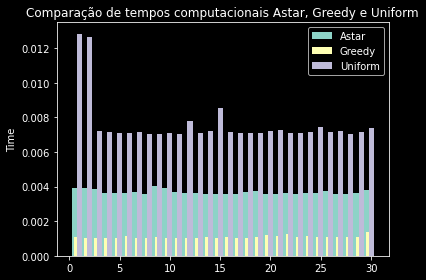

In [ ]:
import matplotlib.pyplot as plt
import time
start = (0, 0)
goal = (14, 14)


timesAstar = []
timesGreed = []
timesUni = []


for i in range(30):
  start_time = time.time()
  astar(graph , start, goal)
  tAstar = (time.time() - start_time)
  timesAstar.append(tAstar)

for i in range(30):
  start_time = time.time()
  greedyH(graph , start, goal)
  tGreed = (time.time() - start_time)
  timesGreed.append(tGreed)

for i in range(30):
  start_time = time.time()
  uniformG(graph , start, goal)
  tUni = (time.time() - start_time)
  timesUni.append(tUni)




print("timesAstar:", timesAstar)
print("timesGreedy:", timesGreed)
print("timesUniform:", timesUni)

y1 = timesAstar
y2 = timesGreed
y3 = timesUni


import matplotlib.pyplot as plt
import numpy as np




x = np.arange(len(y1))  # the label locations
y = np.arange(len(y2)) 
z = np.arange(len(y3))
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width, y1, width, label='Astar')
rects2 = ax.bar(y + width + 0.25, y2, width, label='Greedy')
rects2 = ax.bar(z + width + 0.5, y3, width, label='Uniform')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title('Comparação de tempos computacionais Astar, Greedy e Uniform')
ax.legend()



#plt.style.use('black')

fig.tight_layout()

plt.show()


